In [1]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Данные:
Будем работать с датасетом [The Iris Dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [4]:
X, y = data['data'], data['target']

In [5]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

In [43]:
X[:, :5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Задание:
Будем решать задачу классификации на 3 класса. В качестве модели используется нейронная сеть с одним скрытым слоем. Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа нейронов скрытого слоя. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа нейронов скрытого слоя.

In [31]:
def baseline_model(hidden_input, dim):
    # create model
    model = Sequential()
    model.add(Dense(hidden_input, input_dim=dim, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [26]:
%%time
hidden_inputs = range(1, 5)
means = []
stds = []
for i in hidden_inputs:
    #model = baseline_model(hidden_input=i)
    estimator = KerasClassifier(build_fn=baseline_model, hidden_input=i, dim = 4, epochs=20, batch_size=5, verbose=0)
    result = cross_val_score(estimator, X, dummy_y, cv=kfold)
    means.append(result.mean()*100)
    stds.append(result.std()*100)
    print("Model with %d neurons in hidden layer: ac = %.2f%% (std = %.2f%%)" % (i, result.mean()*100, result.std()*100))

Model with 1 neurons in hidden layer: ac = 38.67% (std = 21.46%)
Model with 2 neurons in hidden layer: ac = 38.67% (std = 24.00%)
Model with 3 neurons in hidden layer: ac = 60.67% (std = 16.45%)
Model with 4 neurons in hidden layer: ac = 42.67% (std = 23.13%)
Wall time: 12min


In [28]:
import matplotlib.pyplot as plt

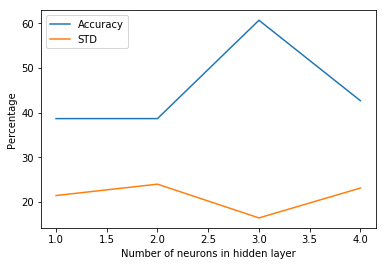

In [29]:
plt.plot(hidden_inputs, means, label='Accuracy')
plt.plot(hidden_inputs, stds, label="STD")
plt.xlabel("Number of neurons in hidden layer")
plt.ylabel("Percentage")
plt.legend()
plt.show()

In [44]:
%%time
hidden_input = 3
dims = range(1, 5)
means = []
stds = []
for i in dims:
    #model = baseline_model(hidden_input=i)
    estimator = KerasClassifier(build_fn=baseline_model, hidden_input=hidden_input, dim = i, epochs=20, batch_size=5, verbose=0)
    result = cross_val_score(estimator, X[:, :i], dummy_y, cv=kfold)
    means.append(result.mean()*100)
    stds.append(result.std()*100)
    print("Model with dim = %d: ac = %.2f%% (std = %.2f%%)" % (i, result.mean()*100, result.std()*100))

Model with dim = 1: ac = 27.33% (std = 14.13%)
Model with dim = 2: ac = 35.33% (std = 16.34%)
Model with dim = 3: ac = 41.33% (std = 26.13%)
Model with dim = 4: ac = 47.33% (std = 23.37%)
Wall time: 15min 46s


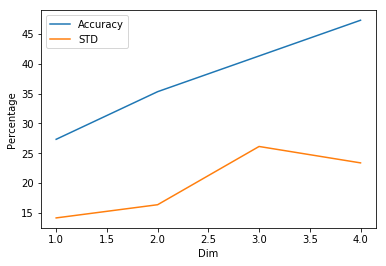

In [45]:
plt.plot(hidden_inputs, means, label='Accuracy')
plt.plot(hidden_inputs, stds, label="STD")
plt.xlabel("Dim")
plt.ylabel("Percentage")
plt.legend()
plt.show()